# **Data Preprocessing**

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [392]:
data = pd.read_csv('Country-data.csv')

In [393]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [394]:
data.shape

(167, 10)

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [396]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [397]:
data.isnull().sum() * 100 / len(data)

,0
country,0.0
child_mort,0.0
exports,0.0
health,0.0
imports,0.0
income,0.0
inflation,0.0
life_expec,0.0
total_fer,0.0
gdpp,0.0


In [398]:
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## **Check for duplications and remove them**

In [399]:
data.duplicated().sum()

np.int64(0)

## **Handling Outliers**

In [400]:
data.drop(columns=["country"], inplace=True)

In [401]:
outlier_counts = {}

for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

In [402]:
print("📊 Outlier count before removal:\n")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

📊 Outlier count before removal:

child_mort: 4 outliers
exports: 5 outliers
health: 2 outliers
imports: 4 outliers
income: 8 outliers
inflation: 5 outliers
life_expec: 3 outliers
total_fer: 1 outliers
gdpp: 25 outliers


In [403]:
for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# **Data visualization**

In [404]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

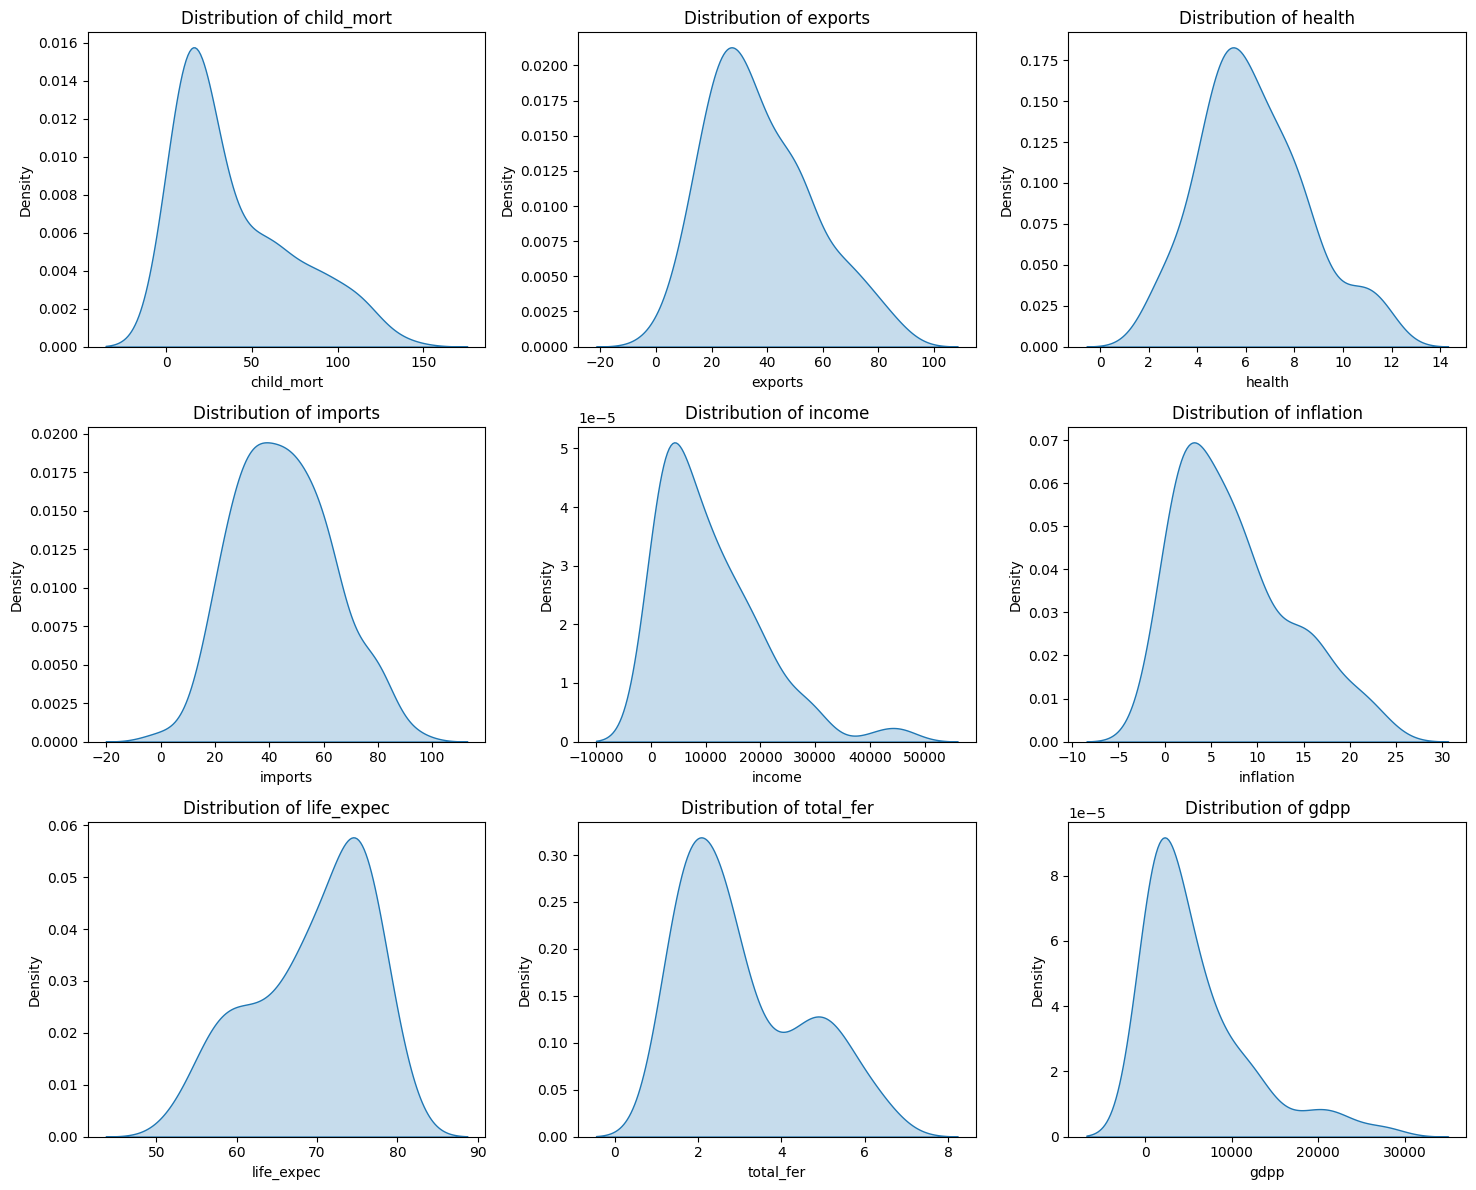

In [405]:
import math

n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data[col], fill=True)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

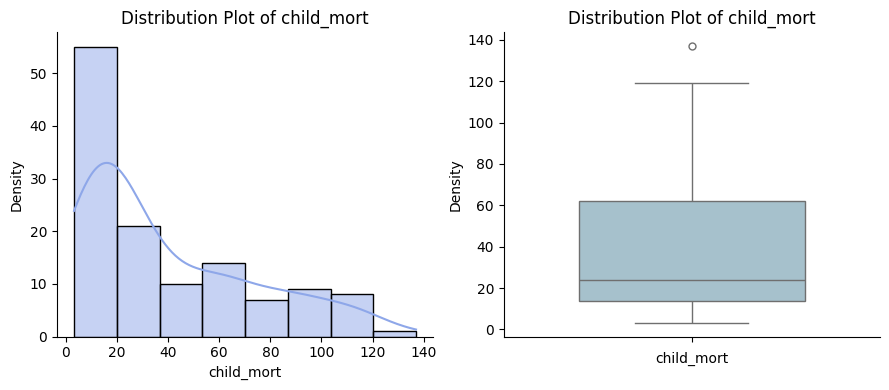

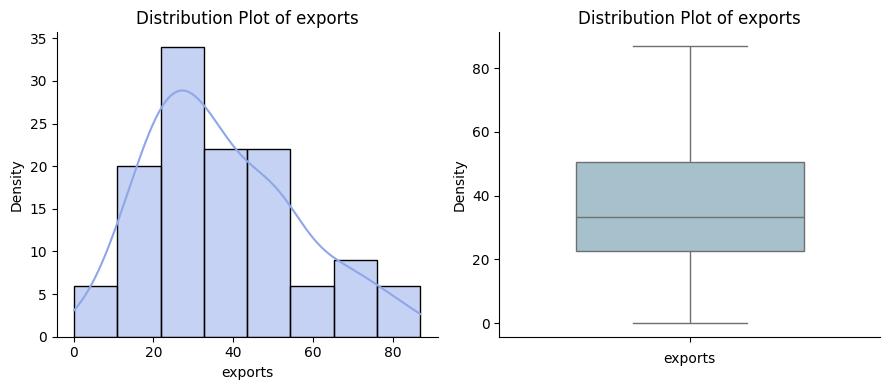

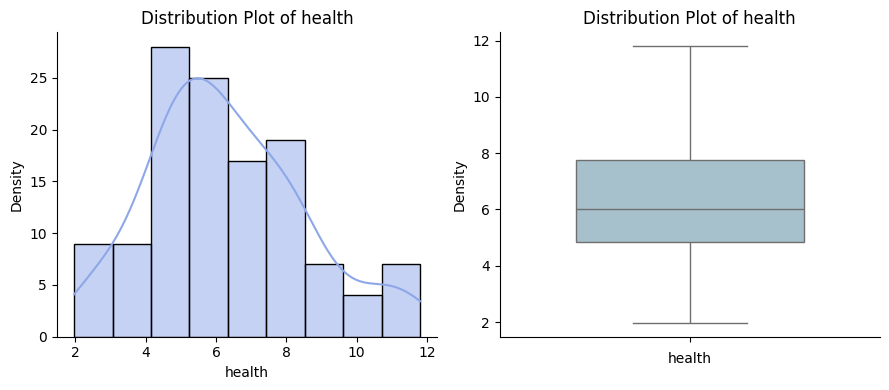

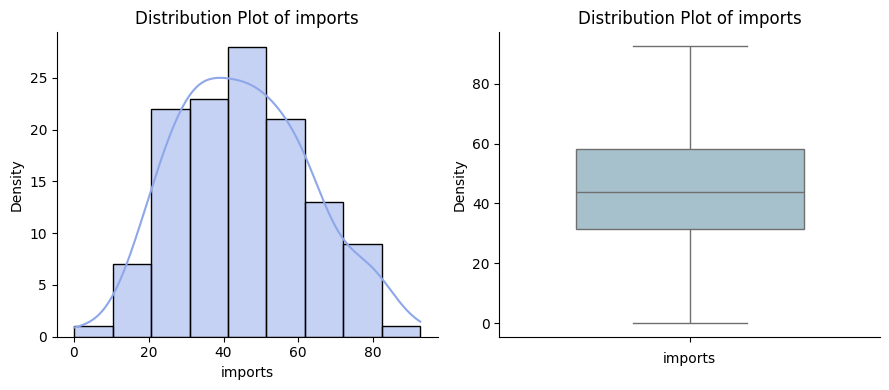

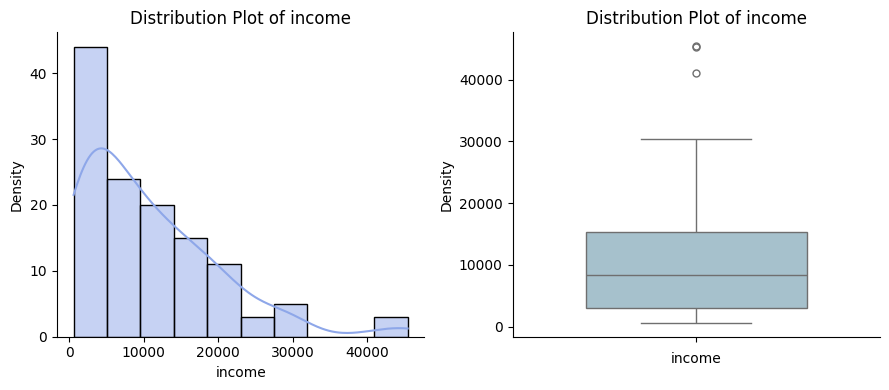

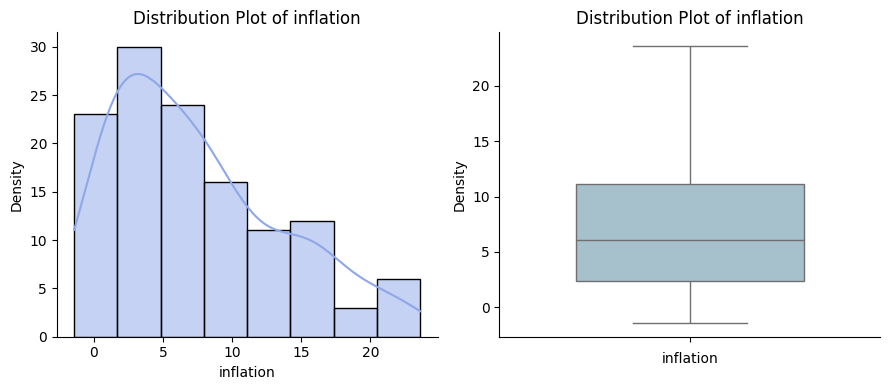

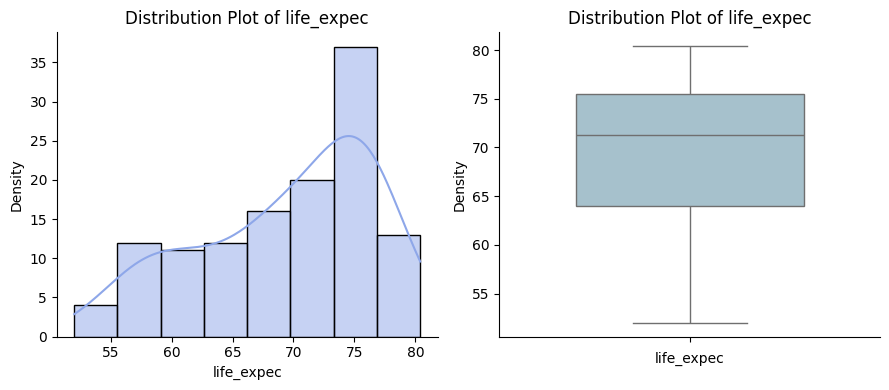

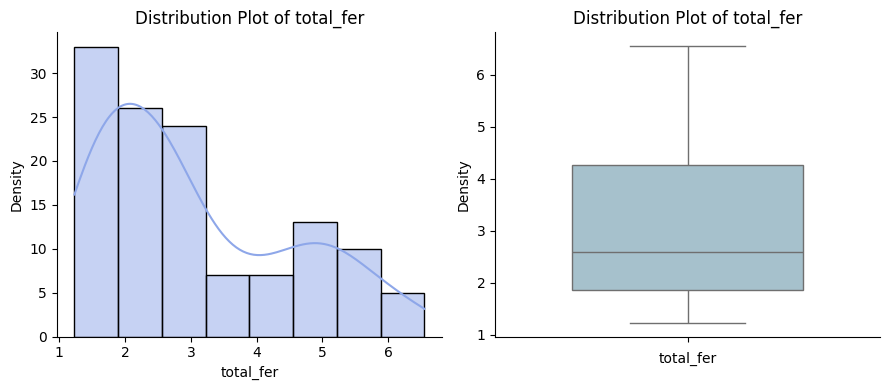

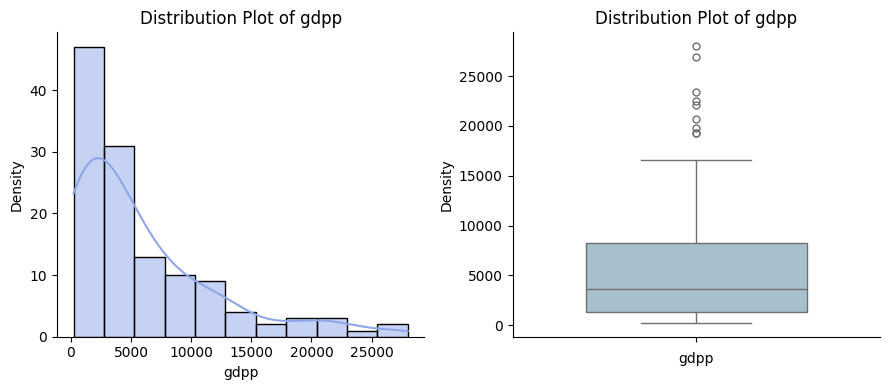

In [406]:
numerical_col = data.columns
for i in range(len(numerical_col)):
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

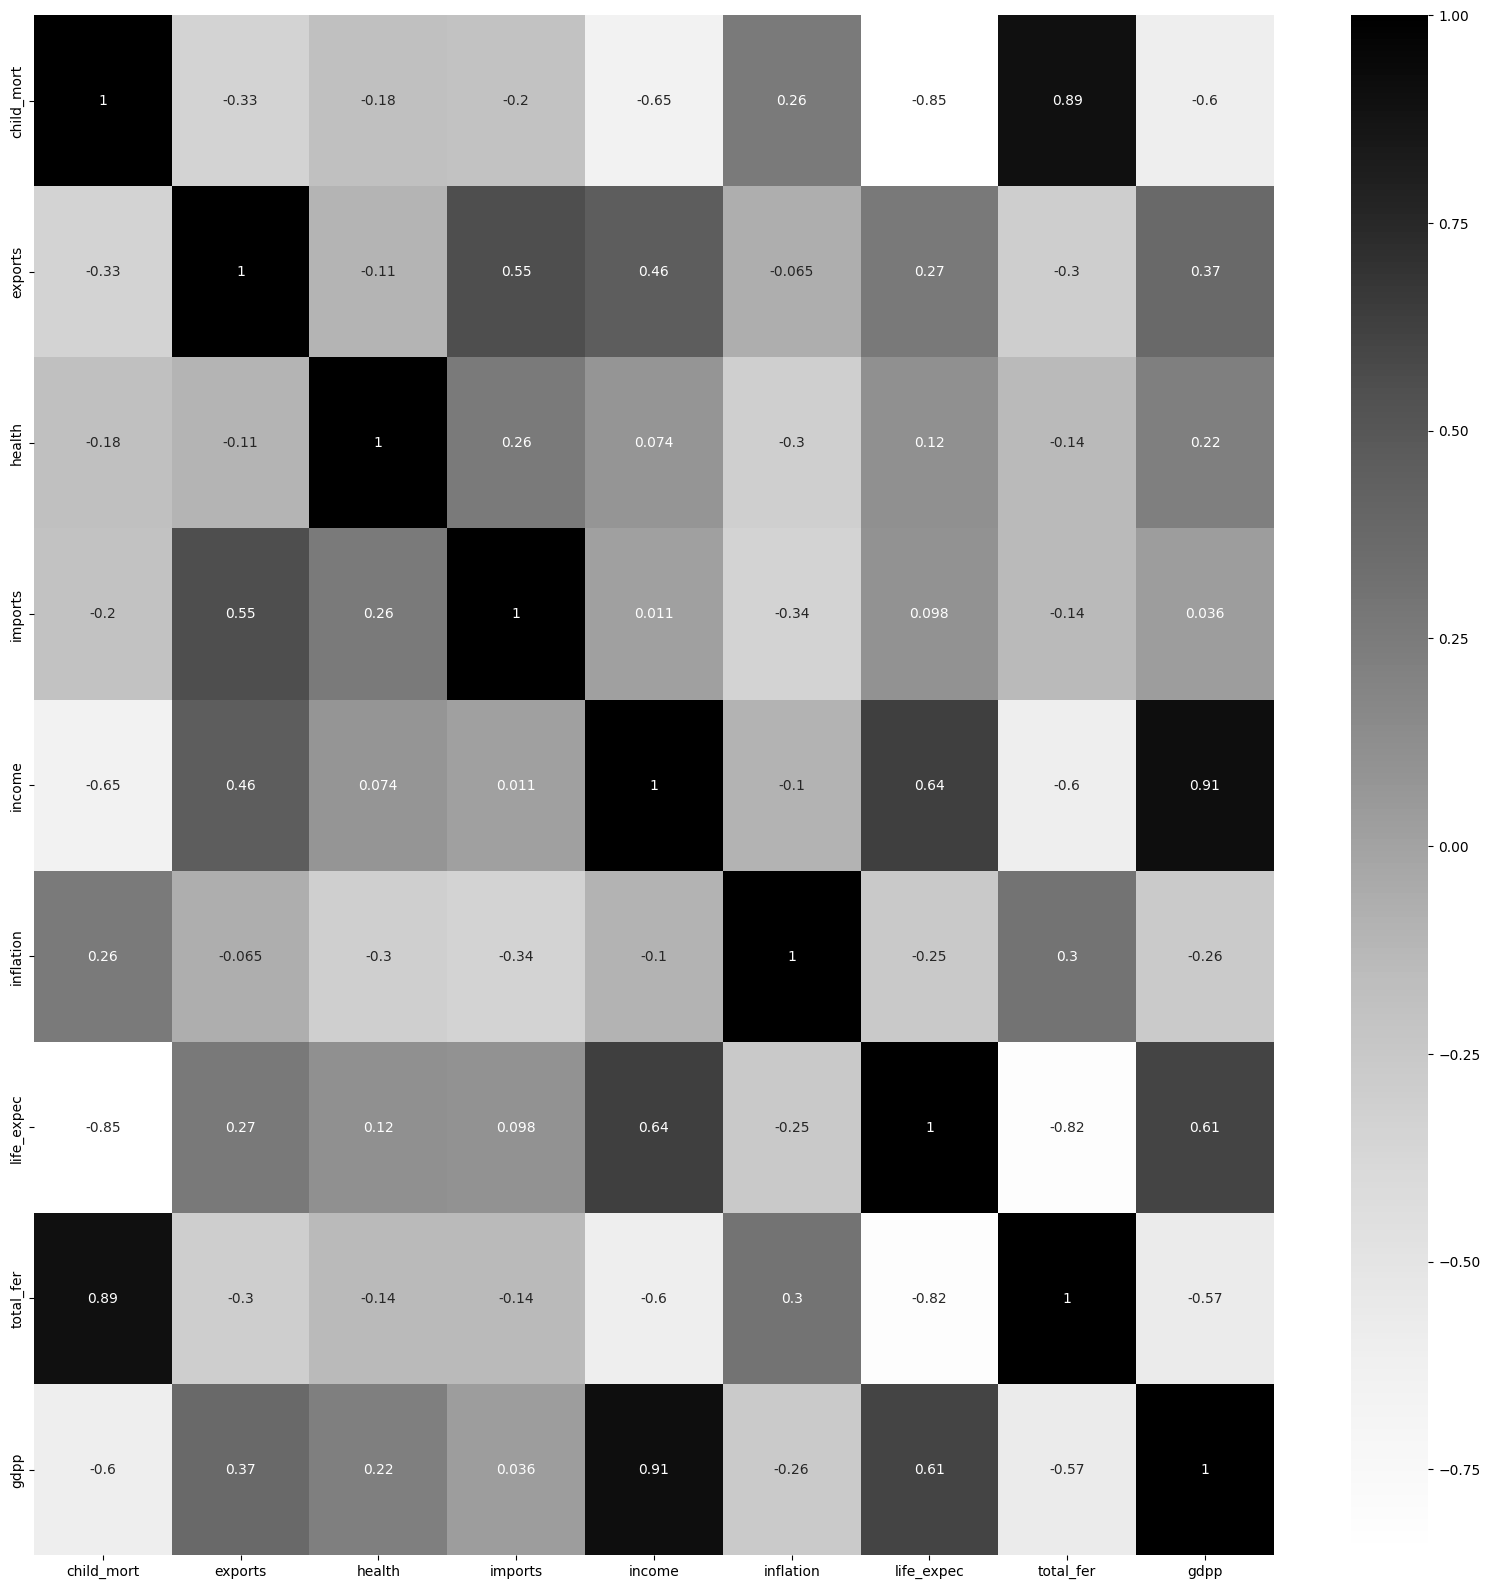

In [407]:
plt.figure(figsize=(20,20))
sns.heatmap(data[numeric_cols].corr(),annot = True,cmap = 'Greys')
plt.show()

# **Feature Engineering**

In [408]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [409]:
categorical_columns

Index([], dtype='object')

In [410]:
numerical_columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [411]:
x = data.drop(columns=['child_mort'])
y = data['child_mort']

# **Data Preparation**

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [413]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# **Clustering**

## **KMeans**

In [414]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [415]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, clusters)

np.float64(0.27831171952970224)

## **Hierachical Clustering**

In [416]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical_model.fit_predict(X_scaled)

In [417]:
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score (Hierarchical Clustering): {hierarchical_silhouette:.4f}")

Silhouette Score (Hierarchical Clustering): 0.2657


## **PCA**

In [418]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
reduced_data = pca_model.fit_transform(X_scaled)

In [419]:
kmeans_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (KMeans): {kmeans_score:.4f}")

Silhouette Score (KMeans): 0.2783


In [420]:
def plot_clusters(title, labels):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

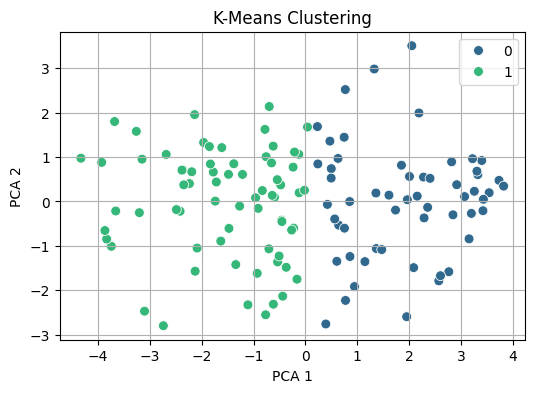

In [421]:
plot_clusters("K-Means Clustering", clusters)

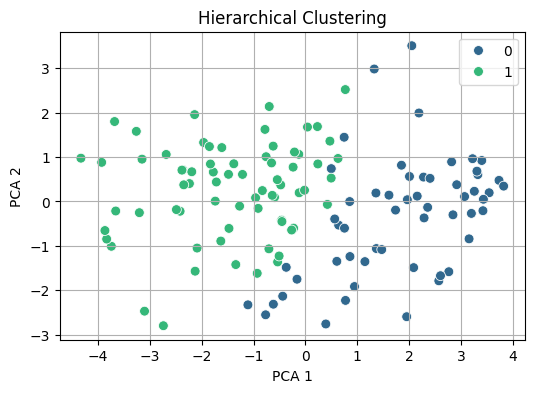

In [422]:
plot_clusters("Hierarchical Clustering", hierarchical_labels)

## **Clustering Comparison**

In [423]:
print(f"Silhouette Score (KMeans): {kmeans_score:.4f}")
print(f"Silhouette Score (Hierarchical Clustering): {hierarchical_silhouette:.4f}")

Silhouette Score (KMeans): 0.2783
Silhouette Score (Hierarchical Clustering): 0.2657
